In [1]:
## Importing all the libraries
import pandas as pd
import os
import seaborn as sns

In [2]:
## importing the dataset
os.chdir("C:\\Users\\aditi\\Desktop\\Term3\\DATA Engineering\\ET_assignment")
df=pd.read_csv("Train.csv")

In [3]:
##veiwing the data
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.Prior_purchases.unique()

array([ 3,  2,  4,  6,  5,  7, 10,  8], dtype=int64)

In [5]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [7]:
import numpy as np
df = df.replace(r'^\s*$', np.nan, regex=True)

In [8]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Exploratory data analysis

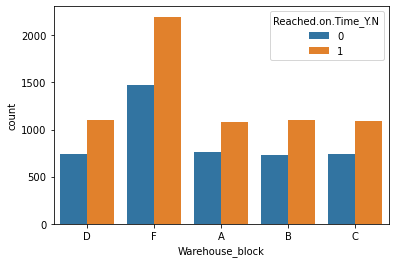

In [9]:
ax = sns.countplot(x="Warehouse_block", hue="Reached.on.Time_Y.N", data=df)

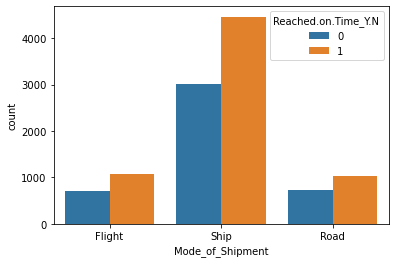

In [10]:
ax = sns.countplot(x="Mode_of_Shipment", hue="Reached.on.Time_Y.N", data=df)

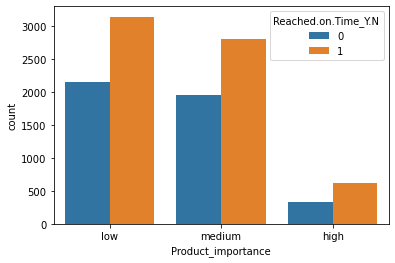

In [11]:
ax = sns.countplot(x="Product_importance", hue="Reached.on.Time_Y.N", data=df)

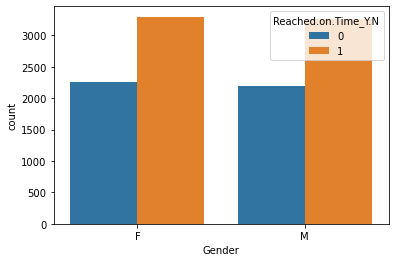

In [12]:
ax = sns.countplot(x="Gender", hue="Reached.on.Time_Y.N", data=df)

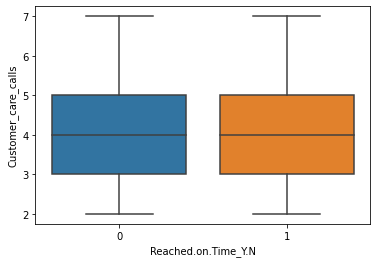

In [13]:
ax = sns.boxplot(x="Reached.on.Time_Y.N", y="Customer_care_calls", data=df)

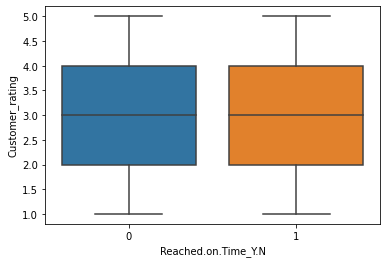

In [14]:
ax = sns.boxplot(x="Reached.on.Time_Y.N", y="Customer_rating", data=df)

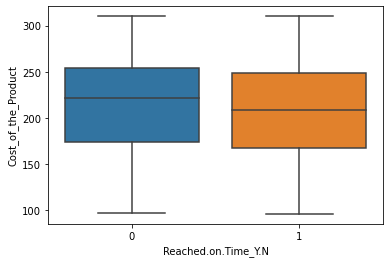

In [15]:
ax = sns.boxplot(x="Reached.on.Time_Y.N", y="Cost_of_the_Product", data=df)

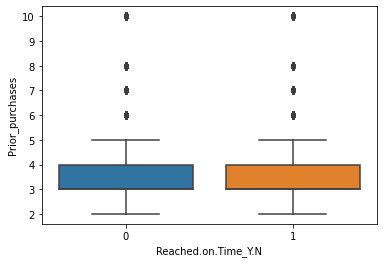

In [16]:
ax = sns.boxplot(x="Reached.on.Time_Y.N", y="Prior_purchases", data=df)

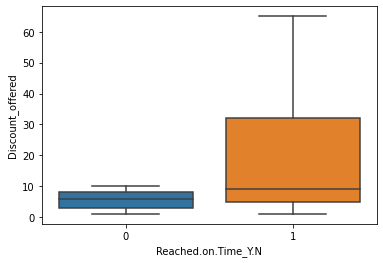

In [17]:
ax = sns.boxplot(x="Reached.on.Time_Y.N", y="Discount_offered", data=df)

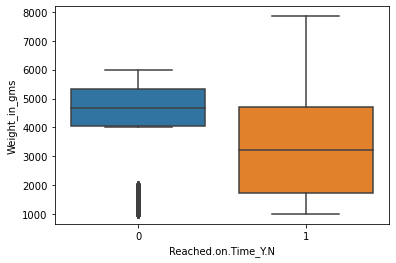

In [18]:
ax = sns.boxplot(x="Reached.on.Time_Y.N", y="Weight_in_gms", data=df)

**Observation**
* the variable Discount_offered has different median for delayed shipment and shipment that were not delayed
* the variable Weight_in_gms has different distributions for delayed shipment and shipment that were not delayed
 

## Data pre processing

In [19]:
df.shape

(10999, 12)

In [20]:
df_dummy=pd.get_dummies(df[['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']],drop_first=True)

In [21]:
df_dummy.head()

,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,1,0


In [22]:
df_dummy.shape

(10999, 9)

In [23]:
df_final=pd.concat([df,df_dummy],axis=1)

In [24]:
df_final.shape

(10999, 21)

In [25]:
df_final.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'],axis=1,inplace=True)

In [26]:
df_final.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_low',
       'Product_importance_medium', 'Gender_M'],
      dtype='object')

In [27]:
df_final.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,2,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,3,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,4,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,5,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


In [28]:
df_final.dtypes

ID                           int64
Customer_care_calls          int64
Customer_rating              int64
Cost_of_the_Product          int64
Prior_purchases              int64
Discount_offered             int64
Weight_in_gms                int64
Reached.on.Time_Y.N          int64
Warehouse_block_B            uint8
Warehouse_block_C            uint8
Warehouse_block_D            uint8
Warehouse_block_F            uint8
Mode_of_Shipment_Road        uint8
Mode_of_Shipment_Ship        uint8
Product_importance_low       uint8
Product_importance_medium    uint8
Gender_M                     uint8
dtype: object

In [29]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(df_final[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms']])

MinMaxScaler()

In [30]:
df_final[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product','Prior_purchases', 'Discount_offered', 'Weight_in_gms']]=mm.transform(df_final[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms']])

## base line model

In [31]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [32]:
Y=df_final['Reached.on.Time_Y.N']

In [33]:
X=df_final.drop(['Reached.on.Time_Y.N'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42,stratify=Y)

In [35]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.535009
         Iterations 8


In [36]:
print(log_reg.summary())

                            Logit Regression Results                           
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                 7699
Model:                           Logit   Df Residuals:                     7683
Method:                            MLE   Df Model:                           15
Date:                 Wed, 05 May 2021   Pseudo R-squ.:                  0.2066
Time:                         00:24:31   Log-Likelihood:                -4119.0
converged:                        True   LL-Null:                       -5191.6
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
ID                           -0.0001   1.01e-05    -13.122      0.000      -0.000      -0.000
Customer_care_calls          -0.1812      0.126     -1.437      0.151      -0.

### Significant variables based on P-value
**1.ID**<br>
**2.Customer_rating**<br>
**3.Cost_of_the_Product**<br>
**4.Discount_offered**<br>
**5.Weight_in_gms**<br>
**6.Warehouse_block_B**<br>
**7.Warehouse_block_D** <br>
**8.Warehouse_block_F**<br>
**9.Mode_of_Shipment_Ship**

In [37]:
predicted=log_reg.predict(X_test)

In [38]:
lr=LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.82      0.67      1331
           1       0.83      0.57      0.68      1969

    accuracy                           0.68      3300
   macro avg       0.70      0.70      0.68      3300
weighted avg       0.72      0.68      0.68      3300



## Feature selection

**1.Using information gain**

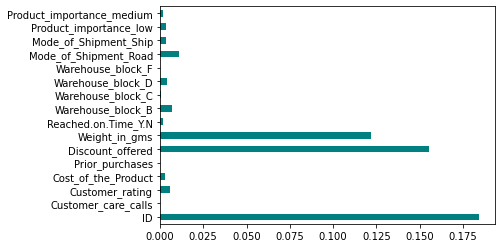

In [39]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances=mutual_info_classif(X,Y)
feat_importances=pd.Series(importances,df_final.columns[0:len(df_final.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

**3.Using Recursive feature elimintion**

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [41]:
#Selecting best feature set using recursive feature elimination method.We select the top 5 features here
rfe=RFE(estimator=LogisticRegression(class_weight='balanced'),n_features_to_select=6)

In [42]:
df_new=df_final.drop(['Reached.on.Time_Y.N'],axis=1)

In [43]:
rfe.fit(df_new,Y,)
rfe.support_

C:\Users\aditi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [44]:
#Rank features in the order of importance 
rfe.ranking_

array([10,  1,  1,  1,  1,  1,  1,  4,  6,  5,  7,  8,  9,  2, 11,  3])

In [45]:
#Take only variables with high support and pass it to the below data frame
df_new_rfe=df_new[df_new.columns[rfe.support_]]


In [46]:
df_new_rfe.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

**As per IG and RFE**
 
Discount_offered <br>
Weight_in_gms<br>
Prior_purchases<br>
Cost_of_the_Product<br>
Customer_rating


## Model selection

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [48]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.


C:\Users\aditi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


C:\Users\aditi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


                               XGBoost trained.
                              LightGBM trained.
                              CatBoost trained.


In [49]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 65.91%
                   K-Nearest Neighbors: 65.06%
                         Decision Tree: 64.91%
Support Vector Machine (Linear Kernel): 59.67%
   Support Vector Machine (RBF Kernel): 67.79%
                        Neural Network: 59.70%
                         Random Forest: 65.61%
                     Gradient Boosting: 68.18%
                               XGBoost: 65.03%
                              LightGBM: 64.94%
                              CatBoost: 65.88%


C:\Users\aditi\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Fitting Gradient BOOSTING as it is performing better than ohter models

In [50]:
X=df_final[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
Y=df_final['Reached.on.Time_Y.N']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42,stratify=Y)
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,gbc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.59      0.93      0.72      3105
           1       0.92      0.56      0.70      4594

    accuracy                           0.71      7699
   macro avg       0.76      0.75      0.71      7699
weighted avg       0.79      0.71      0.71      7699



## Fiting the final model on the entire dataset

In [53]:
X=df[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
gbc_pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier())
gbc_pipe.fit(X,Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [55]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y,gbc_pipe.predict(X)))

              precision    recall  f1-score   support

           0       0.59      0.94      0.72      4436
           1       0.93      0.55      0.69      6563

    accuracy                           0.71     10999
   macro avg       0.76      0.74      0.71     10999
weighted avg       0.79      0.71      0.70     10999



## creating pickle file

In [56]:
import pickle
pkl_file=open("shipment_ecom.pkl","wb")
pickle.dump(gbc_pipe,pkl_file)
pkl_file.close()